# Currency Exchange Rate Prediction with ARIMA

This Jupyter notebook presents an initial exploration of currency exchange rate forecasting, focusing on the Turkish Lira (TRY) to US Dollar (USD) exchange rate. The code utilizes Python libraries such as pandas, numpy, matplotlib, seaborn, plotly, and yfinance for data acquisition and visualization.

Dataset: https://finance.yahoo.com/quote/TRYUSD=X/history?p=TRYUSD=X

Example Solution: https://thecleverprogrammer.com/2023/05/29/currency-exchange-rate-forecasting-using-python/

Hugging Face: https://huggingface.co/spaces/alperugurcan/currency-exchange-rate-prediction

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

import plotly.graph_objs as go
import plotly.io as pio

from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
df = yf.download('TRYUSD=X', period='5y')

[*********************100%***********************]  1 of 1 completed


In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-27,0.176448,0.177044,0.175842,0.176517,0.176517,0
2019-09-30,0.176495,0.177353,0.176215,0.176438,0.176438,0
2019-10-01,0.177053,0.177151,0.174624,0.177044,0.177044,0
2019-10-02,0.174816,0.175599,0.173756,0.174898,0.174898,0
2019-10-03,0.175359,0.176309,0.175085,0.175356,0.175356,0


In [37]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
import plotly.express as px

fig = px.line(df.reset_index(), x='Date', y='Close', title='TRYUSD Exchange Rate')
fig.update_traces(mode='lines')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    xaxis_tickformat='%d-%m-%Y',
    xaxis_tickangle=45,
)
fig.show()

In [46]:
# Calculate yearly growth based on yearly averages
df['Year'] = df.index.year
yearly_avg = df.groupby('Year')['Close'].mean()
growth = yearly_avg.pct_change() * 100  # Convert to percentage

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth,
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of TRY - USD Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=500,
                  height=300)

pio.show(fig)

In [47]:
# Calculate monthly growth based on monthly averages
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()
growth = monthly_avg.pct_change() * 100  # Convert to percentage

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth,
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of TRY - USD Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=500,
                  height=300)

pio.show(fig)

In [51]:
model = auto_arima(df['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [54]:
p, d, q = model.order
print(f"p: {p}, d: {d}, q: {q}")

# Fit the model
model = SARIMAX(df['Close'], order=(p, d, q))
model_fit = model.fit()

p: 2, d: 1, q: 0


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [55]:
# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

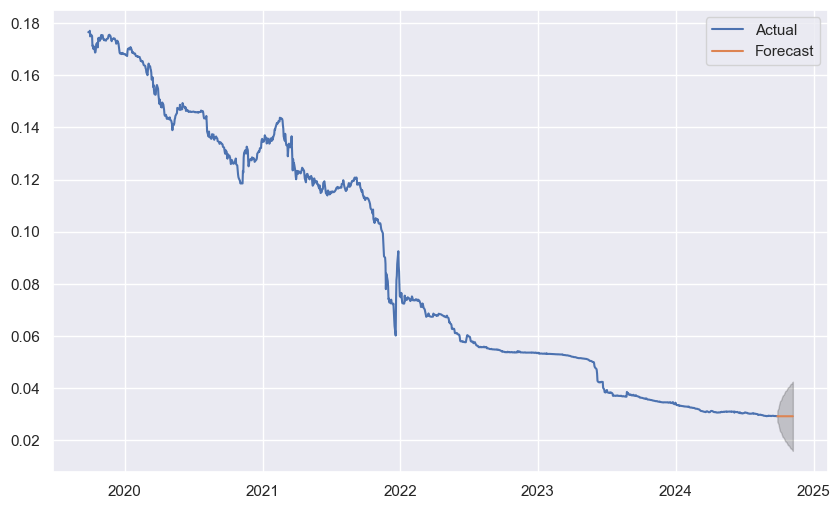

In [56]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend(loc='best')
plt.show()